<a href="https://colab.research.google.com/github/picessakresna/TID046303-Foundation-of-Data-Science/blob/main/EDA/code/EDA_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

-Which industry provides the highest/smallest salaries?

-How does work experience affect salary?

-How gender affects salary?

-How does education level affect salary?

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# 1-Data Collection

In [30]:
# Link to the raw Excel file
excel_url = "https://github.com/picessakresna/TID046303-Foundation-of-Data-Science/raw/main/EDA/file/salaray_survey_2021.xlsx"

# Read the Excel file into a DataFrame
df_ori = pd.read_excel(excel_url)

# Display the DataFrame
df_ori.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [31]:
df = df_ori.copy()
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


# 2-Data Preparation & Cleaning

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27946 entries, 0 to 27945
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                --------------  -----         
 0   Timestamp                                                                                                                                                                                                                             27946 non-null  datetime64[ns]
 1   How old are you?                                                                        

In [33]:
df.nunique()

Timestamp                                                                                                                                                                                                                               27941
How old are you?                                                                                                                                                                                                                            7
What industry do you work in?                                                                                                                                                                                                            1209
Job title                                                                                                                                                                                                                               14292
If your job title needs additional context, plea

In [34]:
df = df.rename(columns={
    'Timestamp': 'Timestamp',
    'How old are you?': 'Age Range',
    'What industry do you work in?': 'Work Industry',
    'Job title': 'Job Title',
    'If your job title needs additional context, please clarify here:': 'Additional Title',
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'Annual Salary',
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': 'Compensation',
    'Please indicate the currency': 'Currency',
    'If "Other," please indicate the currency here: ': 'Other Currency',
    'If your income needs additional context, please provide it here:': 'Additional Salary Context',
    'What country do you work in?': 'Country',
    "If you're in the U.S., what state do you work in?": 'State',
    "What city do you work in?": 'City',
    "How many years of professional work experience do you have overall?": 'Year of Work Experience Overall',
    "How many years of professional work experience do you have in your field?": 'Year of Work Experience in Field',
    "What is your highest level of education completed?": 'Education Level',
    "What is your gender?": 'Gender',
    "What is your race? (Choose all that apply.)": 'Race'
})

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27946 entries, 0 to 27945
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Timestamp                         27946 non-null  datetime64[ns]
 1   Age Range                         27946 non-null  object        
 2   Work Industry                     27874 non-null  object        
 3   Job Title                         27946 non-null  object        
 4   Additional Title                  7233 non-null   object        
 5   Annual Salary                     27946 non-null  int64         
 6   Compensation                      20690 non-null  float64       
 7   Currency                          27946 non-null  object        
 8   Other Currency                    195 non-null    object        
 9   Additional Salary Context         3033 non-null   object        
 10  Country                           27946 non-nu

In [36]:
df[df.duplicated()]

,Timestamp,Age Range,Work Industry,Job Title,Additional Title,Annual Salary,Compensation,Currency,Other Currency,Additional Salary Context,Country,State,City,Year of Work Experience Overall,Year of Work Experience in Field,Education Level,Gender,Race


In [37]:
df.isna().sum()

Timestamp                               0
Age Range                               0
Work Industry                          72
Job Title                               0
Additional Title                    20713
Annual Salary                           0
Compensation                         7256
Currency                                0
Other Currency                      27751
Additional Salary Context           24913
Country                                 0
State                                4982
City                                   79
Year of Work Experience Overall         0
Year of Work Experience in Field        0
Education Level                       214
Gender                                167
Race                                  169
dtype: int64

In [38]:
df[df['Currency'] == "Other"]

,Timestamp,Age Range,Work Industry,Job Title,Additional Title,Annual Salary,Compensation,Currency,Other Currency,Additional Salary Context,Country,State,City,Year of Work Experience Overall,Year of Work Experience in Field,Education Level,Gender,Race
434,2021-04-27 11:09:53.863,25-34,Computing or Tech,Data analyst,NaN,885000,0.0,Other,INR,NaN,India,NaN,Pune,2 - 4 years,2 - 4 years,Master's degree,Woman,Asian or Asian American
603,2021-04-27 11:12:23.955,45-54,Health care,Exec admin,Located in Argentina,1080000,223000.0,Other,Peso Argentino,Exchange about 1USD=165ARS,Argentina,NaN,City of Buenos Aires,11 - 20 years,11 - 20 years,College degree,Woman,"Hispanic, Latino, or Spanish origin"
1311,2021-04-27 11:23:38.945,25-34,Government and Public Administration,Associate,NaN,80640,20160.0,Other,MYR,NaN,Malaysia,NaN,Kuala Lumpur,5-7 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...
1840,2021-04-27 11:33:16.267,35-44,Intergovernmental organization,Consultant,NaN,60000,0.0,Other,CHF,"While I work full time at an organization, I a...",Switzerland,NaN,Geneva,11 - 20 years,5-7 years,Master's degree,Woman,Black or African American
1924,2021-04-27 11:34:55.479,35-44,Sales,CEO,NaN,800000,100000.0,Other,NOK,NaN,Norway,NaN,Oslo,11 - 20 years,11 - 20 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27857,2022-08-10 05:56:33.339,25-34,Computing or Tech,Senior Tech Lead,Software Manager is another title,1800000,NaN,Other,INR,NaN,India,NaN,Bangalore,8 - 10 years,8 - 10 years,NaN,Man,Asian or Asian American
27897,2022-11-10 11:49:07.438,25-34,"Accounting, Banking & Finance","Manager, Risk Reporting",NaN,110000,22000.0,Other,SGD,NaN,Singapore,NaN,Singapore,8 - 10 years,8 - 10 years,College degree,Woman,Asian or Asian American
27902,2022-11-15 18:24:40.674,35-44,NaN,Senior IT Consultant,NaN,120000000,NaN,Other,COP,NaN,Colombia,NaN,Bogota,11 - 20 years,8 - 10 years,College degree,Man,"Hispanic, Latino, or Spanish origin"
27917,2022-12-17 08:10:07.404,25-34,"Marketing, Advertising & PR",Senior Strategist,Creative Marketing Strategist,78000,0.0,Other,SGD,NaN,Singapore,NaN,Singapore,5-7 years,2 - 4 years,College degree,Woman,NaN


In [39]:
df.loc[df['Currency'] == 'Other', 'Currency'] = df.loc[df['Currency'] == 'Other', 'Other Currency']

In [40]:
df.isna().sum()

Timestamp                               0
Age Range                               0
Work Industry                          72
Job Title                               0
Additional Title                    20713
Annual Salary                           0
Compensation                         7256
Currency                                4
Other Currency                      27751
Additional Salary Context           24913
Country                                 0
State                                4982
City                                   79
Year of Work Experience Overall         0
Year of Work Experience in Field        0
Education Level                       214
Gender                                167
Race                                  169
dtype: int64

In [41]:
df[df['Currency'].isna()]['Currency']

9344     NaN
18843    NaN
18882    NaN
18904    NaN
Name: Currency, dtype: object

In [42]:
rows_to_show = [9344, 18843, 18882, 18904]
df.iloc[rows_to_show]

,Timestamp,Age Range,Work Industry,Job Title,Additional Title,Annual Salary,Compensation,Currency,Other Currency,Additional Salary Context,Country,State,City,Year of Work Experience Overall,Year of Work Experience in Field,Education Level,Gender,Race
9344,2021-04-27 17:44:21.776,45-54,Government and Public Administration,Contracts Administrator,NaN,76000,NaN,NaN,NaN,NaN,United States,California,"Berkeley, CA",11 - 20 years,5-7 years,Some college,Woman,White
18843,2021-04-29 03:50:24.400,18-24,Health care,Microbiologist officer,Lab manager kinda work,48000,NaN,NaN,NaN,RM,Malaysia,NaN,Tawau,1 year or less,1 year or less,Some college,Man,Asian or Asian American
18882,2021-04-29 04:30:05.127,25-34,Computing or Tech,Data Analyst,NaN,97000,NaN,NaN,NaN,NaN,Malaysia,NaN,Georgetown,2 - 4 years,2 - 4 years,College degree,Non-binary,"White, Another option not listed here or prefe..."
18904,2021-04-29 04:59:14.128,45-54,Mining,Office manager,NaN,55140,0.0,NaN,NaN,NaN,USA,Nevada,Elko,11 - 20 years,11 - 20 years,Some college,Woman,White


In [43]:
df.loc[[9344, 18904], 'Currency'] = 'USD'
df.loc[[18843, 18882], 'Currency'] = 'RM'

In [44]:
df = df.drop(columns=['Additional Salary Context'])
df = df.drop(columns=['Other Currency'])

In [45]:
df['Currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'INR', 'Peso Argentino',
       'CHF', 'MYR', 'ZAR', 'SEK', 'HKD', 'NOK', 'BR$', 'Dkk', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'DKK', 'Bdt',
       'American Dollars', 'Php', 'PLN (Polish zloty)', 'czech crowns',
       'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS', 'US Dollar',
       'BRL', 'NIS (new Israeli shekel)', 'RMB (chinese yuan)', 'AUD',
       'JPY', 'Taiwanese dollars', 'Philippine Peso', 'SGD',
       'KRW (Korean Won)', 'Czk', 'THB', 'IDR ', 'Sgd', 'Nok', 'NZD',
       'ILS (Shekel)', 'DKK ', 'China RMB', 'AUD Australian ', 'LKR',
       'Polish Złoty', 'Philippine peso (PHP)', 'Australian Dollars ',
       'PHP', 'Equity', 'ARS', 'Argentinian peso (ARS)',
       'Israeli Shekels', 'ILS', 'MXN', 'PhP (Philippine Peso)', 'PLN',
       'KRW', 'SAR', 'RM', 'IDR', 'Argentine Peso', 'Philippine Pesos',
       'Ils', 'INR (Indian Rupee)', 'NTD', 'Danish Kroner', 'Korean Won ',
       'dkk', 'Euro', '

In [46]:
# Map similar values to a standardized format
currency_mapping = {
    'USD': 'USD',
    'GBP': 'GBP',
    'CAD': 'CAD',
    'EUR': 'EUR',
    'AUD/NZD': 'AUD/NZD',
    'INR': 'INR',
    'Peso Argentino': 'ARS',
    'CHF': 'CHF',
    'MYR': 'MYR',
    'ZAR': 'ZAR',
    'SEK': 'SEK',
    'HKD': 'HKD',
    'NOK': 'NOK',
    'BR$': 'BRL',
    'Dkk': 'DKK',
    'TTD': 'TTD',
    'Indian rupees': 'INR',
    'BRL (R$)': 'BRL',
    'Mexican pesos': 'MXN',
    'CZK': 'CZK',
    'DKK': 'DKK',
    'Bdt': 'BDT',
    'American Dollars': 'USD',
    'Php': 'PHP',
    'PLN (Polish zloty)': 'PLN',
    'czech crowns': 'CZK',
    'TRY': 'TRY',
    'Norwegian kroner (NOK)': 'NOK',
    'CNY': 'CNY',
    'ILS/NIS': 'ILS',
    'US Dollar': 'USD',
    'BRL': 'BRL',
    'NIS (new Israeli shekel)': 'ILS',
    'RMB (chinese yuan)': 'CNY',
    'AUD': 'AUD',
    'JPY': 'JPY',
    'Taiwanese dollars': 'TWD',
    'Philippine Peso': 'PHP',
    'SGD': 'SGD',
    'KRW (Korean Won)': 'KRW',
    'Czk': 'CZK',
    'THB': 'THB',
    'IDR ': 'IDR',
    'Sgd': 'SGD',
    'Nok': 'NOK',
    'NZD': 'NZD',
    'ILS (Shekel)': 'ILS',
    'DKK ': 'DKK',
    'China RMB': 'CNY',
    'AUD Australian ': 'AUD',
    'LKR': 'LKR',
    'Polish Złoty': 'PLN',
    'Philippine peso (PHP)': 'PHP',
    'Australian Dollars ': 'AUD',
    'PHP': 'PHP',
    'Equity': 'USD',
    'ARS': 'ARS',
    'Argentinian peso (ARS)': 'ARS',
    'Israeli Shekels': 'ILS',
    'ILS': 'ILS',
    'MXN': 'MXN',
    'PhP (Philippine Peso)': 'PHP',
    'PLN': 'PLN',
    'KRW': 'KRW',
    'SAR': 'SAR',
    'RM': 'MYR',
    'IDR': 'IDR',
    'Argentine Peso': 'ARS',
    'Philippine Pesos': 'PHP',
    'Ils': 'ILS',
    'INR (Indian Rupee)': 'INR',
    'NTD': 'TWD',
    'Danish Kroner': 'DKK',
    'Korean Won ': 'KRW',
    'dkk': 'DKK',
    'Euro': 'EUR',
    'SGD ': 'SGD',
    'Mexican Pesos': 'MXN',
    'THAI  BAHT': 'THB',
    'Thai Baht ': 'THB',
    'croatian kuna': 'HRK',
    'PLN (Zwoty)': 'PLN',
    'Rupees': 'INR',
    'Singapore Dollara': 'SGD',
    'NGN': 'NGN',
    'COP': 'COP'
}

# Clean up the 'currency' column
df['Currency'] = df['Currency'].map(currency_mapping)

In [47]:
df.isna().sum()

Timestamp                               0
Age Range                               0
Work Industry                          72
Job Title                               0
Additional Title                    20713
Annual Salary                           0
Compensation                         7256
Currency                                0
Country                                 0
State                                4982
City                                   79
Year of Work Experience Overall         0
Year of Work Experience in Field        0
Education Level                       214
Gender                                167
Race                                  169
dtype: int64

In [48]:
df['Currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'INR', 'ARS', 'CHF', 'MYR',
       'ZAR', 'SEK', 'HKD', 'NOK', 'BRL', 'DKK', 'TTD', 'MXN', 'CZK',
       'BDT', 'PHP', 'PLN', 'TRY', 'CNY', 'ILS', 'AUD', 'JPY', 'TWD',
       'SGD', 'KRW', 'THB', 'IDR', 'NZD', 'LKR', 'SAR', 'HRK', 'NGN',
       'COP'], dtype=object)

In [49]:
df['Compensation'] = df['Compensation'].fillna(0)

In [50]:
df['Compensation'] = df['Compensation'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27946 entries, 0 to 27945
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Timestamp                         27946 non-null  datetime64[ns]
 1   Age Range                         27946 non-null  object        
 2   Work Industry                     27874 non-null  object        
 3   Job Title                         27946 non-null  object        
 4   Additional Title                  7233 non-null   object        
 5   Annual Salary                     27946 non-null  int64         
 6   Compensation                      27946 non-null  int64         
 7   Currency                          27946 non-null  object        
 8   Country                           27946 non-null  object        
 9   State                             22964 non-null  object        
 10  City                              27867 non-nu

In [51]:
df['Total Salary'] = df['Annual Salary'] + df['Compensation']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27946 entries, 0 to 27945
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Timestamp                         27946 non-null  datetime64[ns]
 1   Age Range                         27946 non-null  object        
 2   Work Industry                     27874 non-null  object        
 3   Job Title                         27946 non-null  object        
 4   Additional Title                  7233 non-null   object        
 5   Annual Salary                     27946 non-null  int64         
 6   Compensation                      27946 non-null  int64         
 7   Currency                          27946 non-null  object        
 8   Country                           27946 non-null  object        
 9   State                             22964 non-null  object        
 10  City                              27867 non-nu

In [52]:
exchange_rates = {
    'USD': 1.0,
    'GBP': 1.42,
    'CAD': 0.78,
    'EUR': 1.18,
    'AUD/NZD': 0.72,
    'INR': 0.014,
    'ARS': 0.012,
    'CHF': 1.08,
    'MYR': 0.24,
    'ZAR': 0.071,
    'SEK': 0.12,
    'HKD': 0.13,
    'NOK': 0.11,
    'BRL': 0.19,
    'DKK': 0.16,
    'TTD': 0.15,
    'MXN': 0.049,
    'CZK': 0.045,
    'BDT': 0.012,
    'PHP': 0.020,
    'PLN': 0.26,
    'TRY': 0.13,
    'CNY': 0.16,
    'ILS': 0.31,
    'AUD': 0.75,
    'JPY': 0.0091,
    'TWD': 0.036,
    'SGD': 0.74,
    'KRW': 0.00089,
    'THB': 0.032,
    'IDR': 7e-05,
    'NZD': 0.72,
    'LKR': 0.0050,
    'SAR': 0.27,
    'HRK': 0.16,
    'NGN': 0.0026,
    'COP': 0.00027
}

def convert_to_usd(row):
    currency = row['Currency']
    salary = row['Total Salary']
    if currency == 'USD':
        return salary
    elif currency in exchange_rates:
        return salary * exchange_rates[currency]
    else:
        raise ValueError("Exchange rate for currency {} not found.".format(currency))

df['Total Salary (USD)'] = df.apply(convert_to_usd, axis=1)
df = df.drop(columns=['Total Salary'])
df['Total Salary (USD)'] = df['Total Salary (USD)'].astype('int64')

In [53]:
df[df['Currency'] != 'USD']

,Timestamp,Age Range,Work Industry,Job Title,Additional Title,Annual Salary,Compensation,Currency,Country,State,City,Year of Work Experience Overall,Year of Work Experience in Field,Education Level,Gender,Race,Total Salary (USD)
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,83212
14,2021-04-27 11:03:10.569,18-24,Health care,Patient care coordinator,NaN,32000,0,CAD,Canada,NaN,Remote,1 year or less,1 year or less,College degree,Woman,White,24960
15,2021-04-27 11:03:11.010,35-44,Utilities & Telecommunications,Quality And Compliance Specialist,NaN,24000,500,GBP,United Kingdom,NaN,Lincoln,11 - 20 years,5-7 years,College degree,Man,White,34790
22,2021-04-27 11:03:27.055,35-44,Nonprofits,Event Planner,NaN,63000,0,CAD,Canada,NaN,Toronto,11 - 20 years,8 - 10 years,Master's degree,Woman,White,49140
41,2021-04-27 11:04:01.337,35-44,"Marketing, Advertising & PR",Senior Copywriter,NaN,35000,6000,GBP,UK,NaN,Liverpool,11 - 20 years,11 - 20 years,College degree,Woman,White,58220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27917,2022-12-17 08:10:07.404,25-34,"Marketing, Advertising & PR",Senior Strategist,Creative Marketing Strategist,78000,0,SGD,Singapore,NaN,Singapore,5-7 years,2 - 4 years,College degree,Woman,NaN,57720
27918,2022-12-19 15:54:49.472,25-34,Computing or Tech,UX/UI Designer,NaN,54000,0,CAD,Canada,NaN,Toronto,2 - 4 years,1 year or less,College degree,Woman,Another option not listed here or prefer not t...,42120
27923,2023-01-08 12:16:14.985,18-24,Computing or Tech,Computer Scientist,NaN,10000,0,TRY,Turkey,NaN,Istanbul,2 - 4 years,2 - 4 years,NaN,Man,"Middle Eastern or Northern African, White",1300
27930,2023-01-31 17:52:38.162,25-34,"Marketing, Advertising & PR",Brand manager,NaN,120500,12000,CAD,Canada,NaN,Toronto,8 - 10 years,5-7 years,College degree,Woman,Asian or Asian American,103350


In [54]:
df.isna().sum()

Timestamp                               0
Age Range                               0
Work Industry                          72
Job Title                               0
Additional Title                    20713
Annual Salary                           0
Compensation                            0
Currency                                0
Country                                 0
State                                4982
City                                   79
Year of Work Experience Overall         0
Year of Work Experience in Field        0
Education Level                       214
Gender                                167
Race                                  169
Total Salary (USD)                      0
dtype: int64

In [55]:
df[df['Work Industry'].isna()]

,Timestamp,Age Range,Work Industry,Job Title,Additional Title,Annual Salary,Compensation,Currency,Country,State,City,Year of Work Experience Overall,Year of Work Experience in Field,Education Level,Gender,Race,Total Salary (USD)
360,2021-04-27 11:08:41.197,45-54,NaN,Proposal Manager,NaN,87938,4000,USD,US,North Carolina,Wilmington,21 - 30 years,11 - 20 years,College degree,Woman,White,91938
645,2021-04-27 11:12:58.989,35-44,NaN,Legal editor,NaN,82000,8200,USD,USA,New York,Rochester,11 - 20 years,11 - 20 years,Master's degree,Woman,White,90200
1604,2021-04-27 11:28:19.790,25-34,NaN,Commissioning Editor,NaN,36000,0,GBP,UK,NaN,London,11 - 20 years,8 - 10 years,Master's degree,Woman,"Asian or Asian American, White",51120
2055,2021-04-27 11:37:01.190,35-44,NaN,Research Manager,NaN,115000,0,USD,US,District of Columbia,DC,21 - 30 years,11 - 20 years,Master's degree,Woman,White,115000
2063,2021-04-27 11:37:11.960,35-44,NaN,office manager,manage a building vs managing employees,40000,0,USD,USA,Nevada,Las Vegas,11 - 20 years,11 - 20 years,High School,Woman,White,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27250,2021-10-26 13:46:24.184,55-64,NaN,Technician Automation,NaN,35000,0,EUR,Ireland,NaN,Donegal,31 - 40 years,31 - 40 years,Master's degree,Man,White,41300
27592,2021-12-28 18:15:36.647,45-54,NaN,Associate professor,Tenured,80000,0,USD,USA,New Hampshire,Keene,11 - 20 years,11 - 20 years,PhD,Woman,White,80000
27730,2022-03-27 10:59:32.710,18-24,NaN,chief executive official,NaN,50,0,ZAR,spain,NaN,castellon,8 - 10 years,11 - 20 years,NaN,NaN,NaN,3
27853,2022-08-04 18:33:50.141,18-24,NaN,Archivist,NaN,50000,0,USD,United States,Wisconsin,Madison,2 - 4 years,2 - 4 years,Master's degree,Man,White,50000


In [56]:
df = df.dropna(subset=['Work Industry'])
df = df.drop(columns=['Additional Title'])

In [57]:
df.isna().sum()

Timestamp                              0
Age Range                              0
Work Industry                          0
Job Title                              0
Annual Salary                          0
Compensation                           0
Currency                               0
Country                                0
State                               4966
City                                  79
Year of Work Experience Overall        0
Year of Work Experience in Field       0
Education Level                      211
Gender                               166
Race                                 168
Total Salary (USD)                     0
dtype: int64

In [58]:
df['Education Level'].unique()

array(["Master's degree", 'College degree', 'PhD', nan, 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

In [59]:
df[df['Education Level'].isna()]

,Timestamp,Age Range,Work Industry,Job Title,Annual Salary,Compensation,Currency,Country,State,City,Year of Work Experience Overall,Year of Work Experience in Field,Education Level,Gender,Race,Total Salary (USD)
13,2021-04-27 11:03:09.718,25-34,Law,Legal Aid Staff Attorney,52000,0,USD,United States,Minnesota,Saint Paul,2 - 4 years,2 - 4 years,NaN,Woman,White,52000
24,2021-04-27 11:03:31.493,25-34,Public Library,Teen Librarian,44500,0,USD,US,Florida,Bradenton,5-7 years,2 - 4 years,NaN,Woman,White,44500
192,2021-04-27 11:06:27.226,35-44,Education (Higher Education),Associate Director,63000,2000,USD,United States,Texas,El Paso,11 - 20 years,8 - 10 years,NaN,Woman,"Hispanic, Latino, or Spanish origin",65000
241,2021-04-27 11:07:12.342,35-44,Sales,Sales support,23050,0,GBP,England,NaN,London,11 - 20 years,8 - 10 years,NaN,Woman,White,32731
659,2021-04-27 11:13:14.239,45-54,Utilities & Telecommunications,Financial Analyst,87360,0,USD,USA,Texas,Houston,21 - 30 years,11 - 20 years,NaN,Woman,Black or African American,87360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27774,2022-04-23 14:47:07.128,18-24,"Accounting, Banking & Finance",accountant,35000,0,USD,USA,Delaware,NY,1 year or less,11 - 20 years,NaN,Man,White,35000
27857,2022-08-10 05:56:33.339,25-34,Computing or Tech,Senior Tech Lead,1800000,0,INR,India,NaN,Bangalore,8 - 10 years,8 - 10 years,NaN,Man,Asian or Asian American,25200
27923,2023-01-08 12:16:14.985,18-24,Computing or Tech,Computer Scientist,10000,0,TRY,Turkey,NaN,Istanbul,2 - 4 years,2 - 4 years,NaN,Man,"Middle Eastern or Northern African, White",1300
27927,2023-01-27 22:56:43.479,25-34,Government and Public Administration,Environmental Specialist,75000,0,USD,USA,Ohio,Columbus,8 - 10 years,8 - 10 years,NaN,Woman,Asian or Asian American,75000


In [60]:
df['Education Level'] = df['Education Level'].fillna('Not Known')

In [61]:
df.isna().sum()

Timestamp                              0
Age Range                              0
Work Industry                          0
Job Title                              0
Annual Salary                          0
Compensation                           0
Currency                               0
Country                                0
State                               4966
City                                  79
Year of Work Experience Overall        0
Year of Work Experience in Field       0
Education Level                        0
Gender                               166
Race                                 168
Total Salary (USD)                     0
dtype: int64

In [62]:
df['Gender'].unique()

array(['Woman', 'Non-binary', 'Man', nan, 'Other or prefer not to answer',
       'Prefer not to answer'], dtype=object)

In [63]:
df[df['Gender'].isna()]

,Timestamp,Age Range,Work Industry,Job Title,Annual Salary,Compensation,Currency,Country,State,City,Year of Work Experience Overall,Year of Work Experience in Field,Education Level,Gender,Race,Total Salary (USD)
171,2021-04-27 11:06:12.250,25-34,Government and Public Administration,Program Analyst,117500,1500,USD,USA,NaN,Washington DC,8 - 10 years,5-7 years,Master's degree,NaN,"Hispanic, Latino, or Spanish origin",119000
490,2021-04-27 11:10:42.858,25-34,Hospitality & Events,Senior Manager,75000,25000,USD,USA,California,Los Angeles,5-7 years,5-7 years,College degree,NaN,White,100000
537,2021-04-27 11:11:24.045,25-34,Education (Higher Education),Online Instructor,70000,0,CAD,Canada,NaN,"Waterloo, ON",5-7 years,5-7 years,Master's degree,NaN,White,54600
647,2021-04-27 11:13:01.276,35-44,Media & Digital,Assistant Editor,40000,0,USD,United States of America,New Jersey,Philly 'burbs,11 - 20 years,11 - 20 years,College degree,NaN,White,40000
658,2021-04-27 11:13:13.913,25-34,Nonprofits,Prospect Research Coordinator,65000,0,USD,United States,New Jersey,Newark,8 - 10 years,8 - 10 years,Master's degree,NaN,White,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27327,2021-10-26 15:29:51.266,25-34,Business or Consulting,Operationnal planning manager,33000,0,EUR,France,NaN,Paris,2 - 4 years,2 - 4 years,Master's degree,NaN,White,38940
27339,2021-10-26 16:06:25.991,35-44,Engineering or Manufacturing,Sr. Infrastructure Engineer,110000,11000,USD,USA,North Carolina,Raleigh,8 - 10 years,8 - 10 years,College degree,NaN,White,121000
27587,2021-12-28 16:51:43.340,35-44,Education (Primary/Secondary),teacher,58000,0,EUR,germany,NaN,mannheim,21 - 30 years,5-7 years,Not Known,NaN,NaN,68440
27932,2023-02-01 07:53:38.039,45-54,Law,Attorney,110000,12000,USD,US,Virginia,Chesapeake,21 - 30 years,5-7 years,"Professional degree (MD, JD, etc.)",NaN,White,122000


In [64]:
df['Gender'] = df['Gender'].fillna('Prefer not to answer')

In [65]:
df.isna().sum()

Timestamp                              0
Age Range                              0
Work Industry                          0
Job Title                              0
Annual Salary                          0
Compensation                           0
Currency                               0
Country                                0
State                               4966
City                                  79
Year of Work Experience Overall        0
Year of Work Experience in Field       0
Education Level                        0
Gender                                 0
Race                                 168
Total Salary (USD)                     0
dtype: int64

In [66]:
df[df['Race'].isna()]

,Timestamp,Age Range,Work Industry,Job Title,Annual Salary,Compensation,Currency,Country,State,City,Year of Work Experience Overall,Year of Work Experience in Field,Education Level,Gender,Race,Total Salary (USD)
445,2021-04-27 11:10:04.980,25-34,Property or Construction,HR Manager,82400,0,USD,USA,Washington,Seattle,8 - 10 years,5-7 years,College degree,Woman,NaN,82400
479,2021-04-27 11:10:31.915,25-34,Education (Higher Education),Finance assistant,37024,0,USD,United States,Michigan,Kalamazoo,5-7 years,2 - 4 years,PhD,Other or prefer not to answer,NaN,37024
530,2021-04-27 11:11:17.708,25-34,Computing or Tech,Data Engineer,95000,3000,USD,USA,Maryland,Baltimore,8 - 10 years,2 - 4 years,College degree,Man,NaN,98000
773,2021-04-27 11:14:43.385,35-44,Education (Higher Education),Curriculum & Teaching Specialist,40460,0,USD,United States,Arkansas,Fayetteville,11 - 20 years,8 - 10 years,Master's degree,Prefer not to answer,NaN,40460
1159,2021-04-27 11:21:10.656,35-44,Government and Public Administration,Chief of Staff,102000,0,CAD,Canada,NaN,Ottawa,11 - 20 years,1 year or less,Not Known,Woman,NaN,79560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,2022-08-23 09:28:03.185,25-34,Art & Design,Project Manager,64000,0,USD,USA,California,Oakland,5-7 years,1 year or less,College degree,Woman,NaN,64000
27885,2022-10-14 17:38:40.044,25-34,Education (Higher Education),"Assistant Director, Phonathon Program",64220,0,USD,USA,Massachusetts,"Cambridge, MA",2 - 4 years,2 - 4 years,College degree,Woman,NaN,64220
27914,2022-12-11 10:08:24.249,25-34,Health care,Pharmacist,151257,9075,USD,USA,Colorado,Colorado,5-7 years,8 - 10 years,"Professional degree (MD, JD, etc.)",Woman,NaN,160332
27917,2022-12-17 08:10:07.404,25-34,"Marketing, Advertising & PR",Senior Strategist,78000,0,SGD,Singapore,NaN,Singapore,5-7 years,2 - 4 years,College degree,Woman,NaN,57720


In [67]:
race_counts = df['Race'].value_counts()
print(race_counts)

Race
White                                                                                                                            23106
Asian or Asian American                                                                                                           1379
Black or African American                                                                                                          666
Another option not listed here or prefer not to answer                                                                             618
Hispanic, Latino, or Spanish origin                                                                                                590
Hispanic, Latino, or Spanish origin, White                                                                                         382
Asian or Asian American, White                                                                                                     342
Black or African American, White                  

In [68]:
df['Race'] = df['Race'].fillna('Another option not listed here or prefer not to answer')

In [69]:
df.isna().sum()

Timestamp                              0
Age Range                              0
Work Industry                          0
Job Title                              0
Annual Salary                          0
Compensation                           0
Currency                               0
Country                                0
State                               4966
City                                  79
Year of Work Experience Overall        0
Year of Work Experience in Field       0
Education Level                        0
Gender                                 0
Race                                   0
Total Salary (USD)                     0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27874 entries, 0 to 27945
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Timestamp                         27874 non-null  datetime64[ns]
 1   Age Range                         27874 non-null  object        
 2   Work Industry                     27874 non-null  object        
 3   Job Title                         27874 non-null  object        
 4   Annual Salary                     27874 non-null  int64         
 5   Compensation                      27874 non-null  int64         
 6   Currency                          27874 non-null  object        
 7   Country                           27874 non-null  object        
 8   State                             22908 non-null  object        
 9   City                              27795 non-null  object        
 10  Year of Work Experience Overall   27874 non-null  o

## 3-Exploratory Data Analysis (EDA) + Data Visualization

In [85]:
# Find the index of the maximum value in the "Total Salary" column
max_index = df['Total Salary (USD)'].idxmax()

# Get the corresponding value in the "Industry" column using the index
max_industry = df.loc[max_index, 'Work Industry']

# Get the maximum value in the "Total Salary" column
max_salary = df['Total Salary (USD)'].max()

print("Index of the maximum Total Salary:", max_index)
print("Industry with maximum Total Salary:", max_industry)
print("Maximum Total Salary:", max_salary)

Index of the maximum Total Salary: 3605
Industry with maximum Total Salary: Utilities & Telecommunications
Maximum Total Salary: 102000000


In [105]:
df.loc[max_index]

Timestamp                                    2021-04-27 12:11:16.839000
Age Range                                                         25-34
Work Industry                            Utilities & Telecommunications
Job Title                                            Operations Manager
Annual Salary                                                 102000000
Compensation                                                          0
Currency                                                            USD
Country                                                        Colombia
State                                                               NaN
City                                                             Bogota
Year of Work Experience Overall                            8 - 10 years
Year of Work Experience in Field                         1 year or less
Education Level                                            Some college
Gender                                                          

In [91]:
# Find the index of the maximum value in the "Total Salary" column
min_index = df['Total Salary (USD)'].idxmin()

# Get the corresponding value in the "Industry" column using the index
min_industry = df.loc[min_index, 'Work Industry']

# Get the maximum value in the "Total Salary" column
min_salary = df['Total Salary (USD)'].min()

print("Index of the minimum Total Salary:", min_index)
print("Industry with minimum Total Salary:", min_industry)
print("Minimum Total Salary:", min_salary)

Index of the minimum Total Salary: 8739
Industry with minimum Total Salary: Stay-at-home parent
Minimum Total Salary: 0


In [106]:
df.loc[min_index]

Timestamp                           2021-04-27 16:34:55.723000
Age Range                                                35-44
Work Industry                              Stay-at-home parent
Job Title                                             "mum" ;)
Annual Salary                                                0
Compensation                                                 0
Currency                                                   USD
Country                                                     US
State                                                 Kentucky
City                                                Louisville
Year of Work Experience Overall                  21 - 30 years
Year of Work Experience in Field                  8 - 10 years
Education Level                                Master's degree
Gender                                                   Woman
Race                                                     White
Total Salary (USD)                                     

In [78]:
# Calculate the mean salary for each industry
mean_salary_by_industry = df.groupby('Work Industry')['Total Salary (USD)'].mean()

# Get the industry with the biggest salary
industry_with_max_salary = mean_salary_by_industry.idxmax()
max_salary = mean_salary_by_industry.max()

formatted_max_salary = '${:,.2f}'.format(max_salary)
print(f"Industry with the biggest salary: {industry_with_max_salary} (Mean Salary: {formatted_max_salary})")

# Get the industry with the smallest salary
industry_with_min_salary = mean_salary_by_industry.idxmin()
min_salary = mean_salary_by_industry.min()

formatted_min_salary = '${:,.2f}'.format(min_salary)
print(f"Industry with the smallest salary: {industry_with_min_salary} (Mean Salary: {formatted_min_salary})")


Industry with the biggest salary: Oil (Mean Salary: $1,120,380.00)
Industry with the smallest salary: Homemaker (Mean Salary: $0.00)


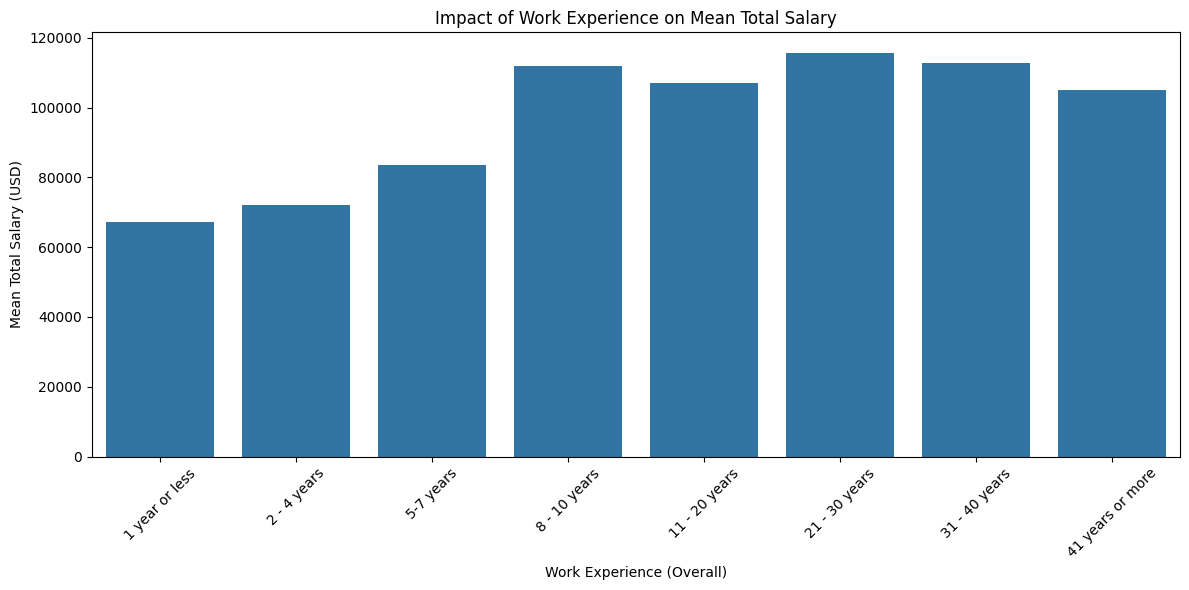

In [108]:
# Define custom sorting order
custom_order = ['1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years',
                '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more']

# Calculate mean total salary for each work experience category
mean_salary_by_experience = df.groupby('Year of Work Experience Overall')['Total Salary (USD)'].mean().reset_index()

# Sort the DataFrame by custom order
mean_salary_by_experience['Year of Work Experience Overall'] = pd.Categorical(mean_salary_by_experience['Year of Work Experience Overall'], categories=custom_order, ordered=True)
mean_salary_by_experience = mean_salary_by_experience.sort_values(by='Year of Work Experience Overall')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year of Work Experience Overall', y='Total Salary (USD)', data=mean_salary_by_experience)
plt.title('Impact of Work Experience on Mean Total Salary')
plt.xlabel('Work Experience (Overall)')
plt.ylabel('Mean Total Salary (USD)')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Wrap x-axis labels into multiple lines
plt.xticks(ticks=range(len(mean_salary_by_experience)), labels=[textwrap.fill(label, 20) for label in mean_salary_by_experience['Year of Work Experience Overall']], rotation=45)

plt.tight_layout()
plt.show()

In [109]:
df.groupby('Year of Work Experience Overall')['Total Salary (USD)'].mean().reset_index().sort_values(by='Total Salary (USD)', ascending=False)

,Year of Work Experience Overall,Total Salary (USD)
3,21 - 30 years,115770.029363
4,31 - 40 years,112628.320973
7,8 - 10 years,112005.147201
1,11 - 20 years,107041.056698
5,41 years or more,105113.625000
6,5-7 years,83527.372112
2,2 - 4 years,72064.248495
0,1 year or less,67302.986166


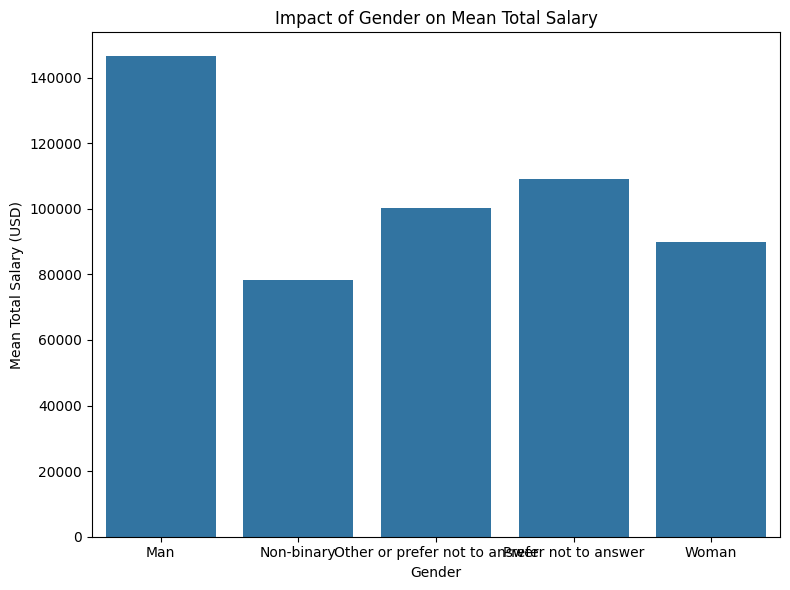

In [110]:
# Calculate mean total salary for each gender category
mean_salary_by_gender = df.groupby('Gender')['Total Salary (USD)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Total Salary (USD)', data=mean_salary_by_gender)
plt.title('Impact of Gender on Mean Total Salary')
plt.xlabel('Gender')
plt.ylabel('Mean Total Salary (USD)')
plt.tight_layout()
plt.show()


In [111]:
df.groupby('Gender')['Total Salary (USD)'].mean().reset_index().sort_values(by='Total Salary (USD)', ascending=False)

,Gender,Total Salary (USD)
0,Man,146490.832749
3,Prefer not to answer,109162.449102
2,Other or prefer not to answer,100140.351724
4,Woman,89787.499577
1,Non-binary,78403.297844


In [113]:
df['Education Level'].unique()

array(["Master's degree", 'College degree', 'PhD', 'Not Known',
       'Some college', 'High School',
       'Professional degree (MD, JD, etc.)'], dtype=object)

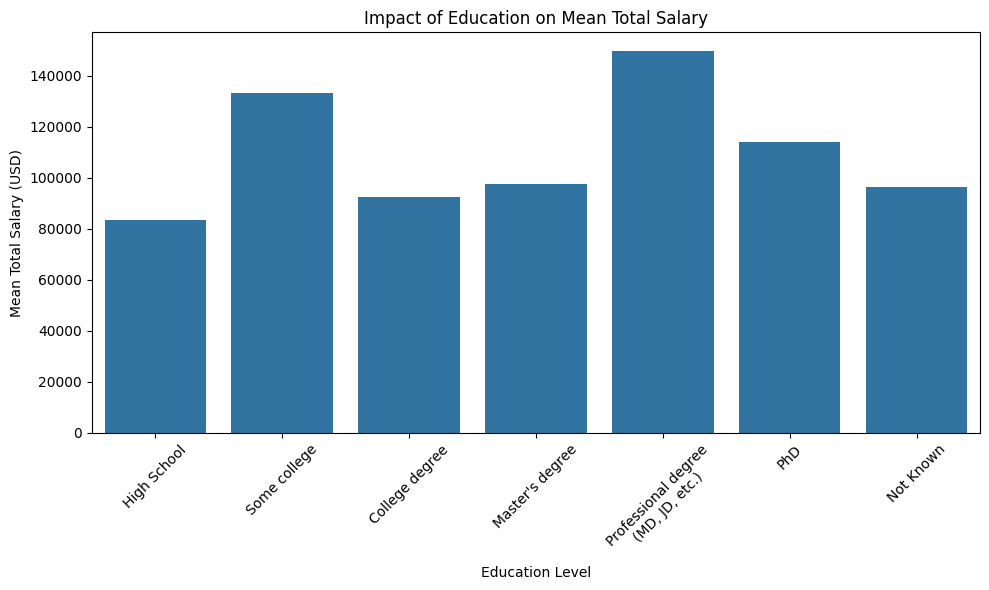

In [116]:
# Define custom sorting order
custom_order = ['High School', 'Some college', 'College degree', "Master's degree",
                'Professional degree (MD, JD, etc.)', 'PhD', 'Not Known']

# Calculate mean total salary for each education category
mean_salary_by_education = df.groupby('Education Level')['Total Salary (USD)'].mean().reset_index()

# Sort the DataFrame by custom order
mean_salary_by_education['Education Level'] = pd.Categorical(mean_salary_by_education['Education Level'], categories=custom_order, ordered=True)
mean_salary_by_education = mean_salary_by_education.sort_values(by='Education Level')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Total Salary (USD)', data=mean_salary_by_education)
plt.title('Impact of Education on Mean Total Salary')
plt.xlabel('Education Level')
plt.ylabel('Mean Total Salary (USD)')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Wrap x-axis labels into multiple lines
plt.xticks(ticks=range(len(mean_salary_by_education)), labels=[textwrap.fill(label, 20) for label in mean_salary_by_education['Education Level']], rotation=45)

plt.tight_layout()
plt.show()


In [117]:
df.groupby('Education Level')['Total Salary (USD)'].mean().reset_index().sort_values(by='Total Salary (USD)', ascending=False)

,Education Level,Total Salary (USD)
5,"Professional degree (MD, JD, etc.)",149648.751703
6,Some college,133170.243759
4,PhD,114144.150598
2,Master's degree,97520.957582
3,Not Known,96435.853081
0,College degree,92539.027323
1,High School,83566.732909
